In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import library yang dibutuhkan 


*   numpy => untuk komputasi matrix
*   matplotlib => penggambaran grafik atau plot , digunakan untuk visualiasai grafik
* pandas => digunakan untuk membaca file dari luar(dataset)

In [12]:
covid_data = pd.read_csv("covid-19.csv")
covid_data.head()

Province/State  Country/Region      Last Update  Confirmed  Deaths  \
0          Anhui  Mainland China  1/22/2020 17:00          1       0   
1        Beijing  Mainland China  1/22/2020 17:00         14       0   
2      Chongqing  Mainland China  1/22/2020 17:00          6       0   
3         Fujian  Mainland China  1/22/2020 17:00          1       0   
4          Gansu  Mainland China  1/22/2020 17:00          0       0   

   Recovered  
0          0  
1          0  
2          0  
3          0  
4          0

membaca file dataset dan menampungnya dalam variable student_data , lalu mencetak 5 record pertama dengan menggunakna variable_name.head()

In [11]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178525 entries, 0 to 178524
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Province/State  129268 non-null  object 
 1   Country/Region  178525 non-null  object 
 2   Last Update     178525 non-null  object 
 3   Confirmed       178524 non-null  float64
 4   Deaths          178524 non-null  float64
 5   Recovered       178524 non-null  float64
dtypes: float64(3), object(3)
memory usage: 8.2+ MB


melihat ringkasan data

In [10]:
covid_data['Last Update'].unique()

array(['1/22/2020 17:00', '1/23/20 17:00', '1/24/20 17:00', ...,
       '14/12/2020 05.26', '15/12/2020 05.26', '15/12/2020 '],
      dtype=object)

melihat data last update unique

In [24]:
latest= '15/12/2020 05.26'
covid_data[covid_data['Last Update'] == latest]

Province/State  Country/Region       Last Update  Confirmed  \
178078                NaN     Afghanistan  15/12/2020 05.26      48718   
178079                NaN         Albania  15/12/2020 05.26      49191   
178080                NaN         Algeria  15/12/2020 05.26      92597   
178081                NaN         Andorra  15/12/2020 05.26       7382   
178082                NaN          Angola  15/12/2020 05.26      16277   
...                   ...             ...               ...        ...   
178834  Zaporizhia Oblast         Ukraine  15/12/2020 05.26      42435   
178835            Zeeland     Netherlands  15/12/2020 05.26       7677   
178836           Zhejiang  Mainland China  15/12/2020 05.26       1297   
178837    Zhytomyr Oblast         Ukraine  15/12/2020 05.26      34491   
178838       Zuid-Holland     Netherlands  15/12/2020 05.26     168806   

        Deaths  Recovered  
178078    1969      38252  
178079    1016      24820  
178080    2609      60888  
178081      79       6706  
178082     372       8924  
...        ...        ...  
178834     396      11357  
178835     105          0  
178836       1       1290  
178837     574      24957  
178838    2523          0  

[761 rows x 6 columns]

mencari column yang cocok dengan variable last update

**untuk Negara**

In [15]:
unique_countries = covid_data[covid_data.Confirmed > 0]['Country/Region'].unique()
unique_countries.sort()
unique_countries

array([' Azerbaijan', "('St. Martin',)", 'Afghanistan', 'Albania',
       'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Channel Islands', 'Chile',
       'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Costa Rica', 'Croatia', 'Cuba', 'Curacao', 'Cyprus',
       'Czech Republic', 'Denmark', 'Diamond Princess', 'Djibouti',
       'Dominica', 'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'F

mencari unique contry dengan data confirmed lebih dari 0 dan simpan hasil dalam unique_country dan  sort datanya based on country name

In [35]:
confirmed_case_countries = []

for i in unique_countries:
  confirmed_case_countries.append(covid_data[covid_data.Confirmed > 0]
                                  [covid_data['Country/Region'] == i]
                                  [covid_data['Last Update'] == latest].Confirmed.sum())

<ipython-input-35-c32063d7befc>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  confirmed_case_countries.append(covid_data[covid_data.Confirmed > 0]


menampung semua confirmed case country dalam list dimana data yang terkonfirmasi harus > 0, dan sesuai dengan data di unique contries serta harus berdasarkan latest update terbaru

In [26]:
print(set(zip(unique_countries, confirmed_case_countries)))

{('Canada', 472820), ('Iceland', 5564), ('Latvia', 25885), ('Suriname', 5359), ('Germany', 1357261), ('Bolivia', 147345), ('Kuwait', 146449), ('Brunei', 152), ('Libya', 91357), ('Colombia', 1434516), ('Mozambique', 17002), ('Saudi Arabia', 360013), ('South Africa', 866127), ('Madagascar', 17587), ('South Korea', 44364), ('Taiwan', 740), ('Congo (Kinshasa)', 14513), ('Belgium', 609211), ('Others', 0), ('Faroe Islands', 0), ('Sao Tome and Principe', 1010), ('Croatia', 177358), ('Ecuador', 202180), ('Azerbaijan', 178986), ('Mayotte', 0), ('Malta', 11254), ('Timor-Leste', 31), ('Marshall Islands', 4), ('Antigua and Barbuda', 148), ('Holy See', 27), ('Monaco', 671), ('Jordan', 262477), ('Paraguay', 94223), ('Uzbekistan', 75094), ('Austria', 325051), ('Saint Lucia', 278), ('Ghana', 53014), ('Cameroon', 25214), ('Montenegro', 41803), ('North Macedonia', 73851), ('Israel', 359506), ('Zimbabwe', 11358), ('Mongolia', 917), ('Trinidad and Tobago', 6885), ('Central African Republic', 4936), ('Swed

**untuk Provinsi**

In [27]:
unique_provinces = covid_data[covid_data.Confirmed > 0]['Province/State'].unique()
unique_provinces

array(['Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Guangdong', 'Guangxi',
       'Guizhou', 'Hainan', 'Hebei', 'Henan', 'Hubei', 'Hunan', 'Jiangsu',
       'Jiangxi', 'Liaoning', 'Macau', 'Ningxia', 'Shandong', 'Shanghai',
       'Shanxi', 'Sichuan', 'Taiwan', 'Tianjin', 'Washington', 'Yunnan',
       'Zhejiang', nan, 'Gansu', 'Heilongjiang', 'Hong Kong', 'Jilin',
       'Shaanxi', 'Xinjiang', 'Inner Mongolia', 'Chicago', 'Qinghai',
       'Illinois', 'California', 'Arizona', 'Ontario', 'New South Wales',
       'Victoria', 'British Columbia', 'Bavaria', 'Tibet', 'Queensland',
       'Chicago, IL', 'South Australia', 'Boston, MA', 'Los Angeles, CA',
       'Orange, CA', 'Santa Clara, CA', 'Seattle, WA', 'Tempe, AZ',
       'San Benito, CA', 'Toronto, ON', 'London, ON', 'Madison, WI',
       'Cruise Ship', 'Diamond Princess cruise ship',
       'San Diego County, CA', 'San Antonio, TX', 'Ashland, NE',
       'Travis, CA', 'From Diamond Princess', 'Lackland, TX', 'None',
       'Humboldt

mengambil data unique province dengan confirmed > 0 dan tidak ada data yang unique

In [34]:
confirmed_case_provinces = []
for i in unique_provinces:
  confirmed_case_provinces.append(covid_data[covid_data.Confirmed > 0]
                                  [covid_data['Province/State'] == i]
                                  [covid_data['Last Update'] == latest].Confirmed.sum())

<ipython-input-34-83d1f818d005>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  confirmed_case_provinces.append(covid_data[covid_data.Confirmed > 0]


menampung semua confirmed case provinces dalam list dimana data yang terkonfirmasi harus > 0, dan sesuai dengan data di unique provinces serta harus berdasarkan latest update terbaru

In [36]:
print(set(zip(unique_provinces, confirmed_case_provinces)))

{('Nenets Autonomous Okrug', 723), ('Australian Capital Territory', 117), ('Campania', 175053), ('Khakassia Republic', 14590), ('Cherokee County, GA', 0), ('Providence, RI', 0), ('Antioquia', 231592), ('Valparaiso', 33633), ('Chandigarh', 18714), ('Asturias', 25616), ('Yamalo-Nenets Autonomous Okrug', 29035), ('Saarland', 16282), ('Falkland Islands (Islas Malvinas)', 0), ('Cantabria', 16743), ('Madre de Dios', 9368), ('Vichada', 1072), ('Netherlands', 0), ('Bavaria', 0), ('Illinois', 856118), ('Liaoning', 289), ('United States Virgin Islands', 0), ('Maine', 16349), ('Anguilla', 10), ('South Dakota', 91354), ('Walloon Brabant', 24057), ('Williamson County, TN', 0), ('Tottori', 68), ('Karelia Republic', 21282), ('Saratov Oblast', 30765), ('Araucania', 19891), ('La Rioja', 17344), ('Jefferson County, WA', 0), ('Santander', 58667), ('Hillsborough, FL', 0), ('Oregon', 95010), ('Halland', 8249), ('Tocantins', 85549), ('Douglas County, OR', 0), ('Plymouth County, MA', 0), ('Spartanburg County

In [39]:
nan_indices = []
for i in range(len(unique_provinces)):
  if type(unique_provinces[i]) == float:
    nan_indices.append(i)
    

menampung nilai data nan(kosong) pada nan_indices 

In [40]:
unique_provinces = list(unique_provinces)
confirmed_case_provinces = list(confirmed_case_provinces)

In [41]:
for i in nan_indices:
  unique_provinces.pop(i)
  confirmed_case_provinces.pop(i)

In [43]:
print(set(zip(unique_provinces, confirmed_case_provinces)))

{('Nenets Autonomous Okrug', 723), ('Australian Capital Territory', 117), ('Campania', 175053), ('Khakassia Republic', 14590), ('Cherokee County, GA', 0), ('Providence, RI', 0), ('Antioquia', 231592), ('Valparaiso', 33633), ('Chandigarh', 18714), ('Asturias', 25616), ('Yamalo-Nenets Autonomous Okrug', 29035), ('Saarland', 16282), ('Falkland Islands (Islas Malvinas)', 0), ('Cantabria', 16743), ('Madre de Dios', 9368), ('Vichada', 1072), ('Netherlands', 0), ('Bavaria', 0), ('Illinois', 856118), ('Liaoning', 289), ('United States Virgin Islands', 0), ('Maine', 16349), ('Anguilla', 10), ('South Dakota', 91354), ('Walloon Brabant', 24057), ('Williamson County, TN', 0), ('Tottori', 68), ('Karelia Republic', 21282), ('Saratov Oblast', 30765), ('Araucania', 19891), ('La Rioja', 17344), ('Jefferson County, WA', 0), ('Santander', 58667), ('Hillsborough, FL', 0), ('Oregon', 95010), ('Halland', 8249), ('Tocantins', 85549), ('Douglas County, OR', 0), ('Plymouth County, MA', 0), ('Spartanburg County

menghilangkan nilai nan pada unique_provinces dan confirmed_case_provinces

**Membuat Grafik**

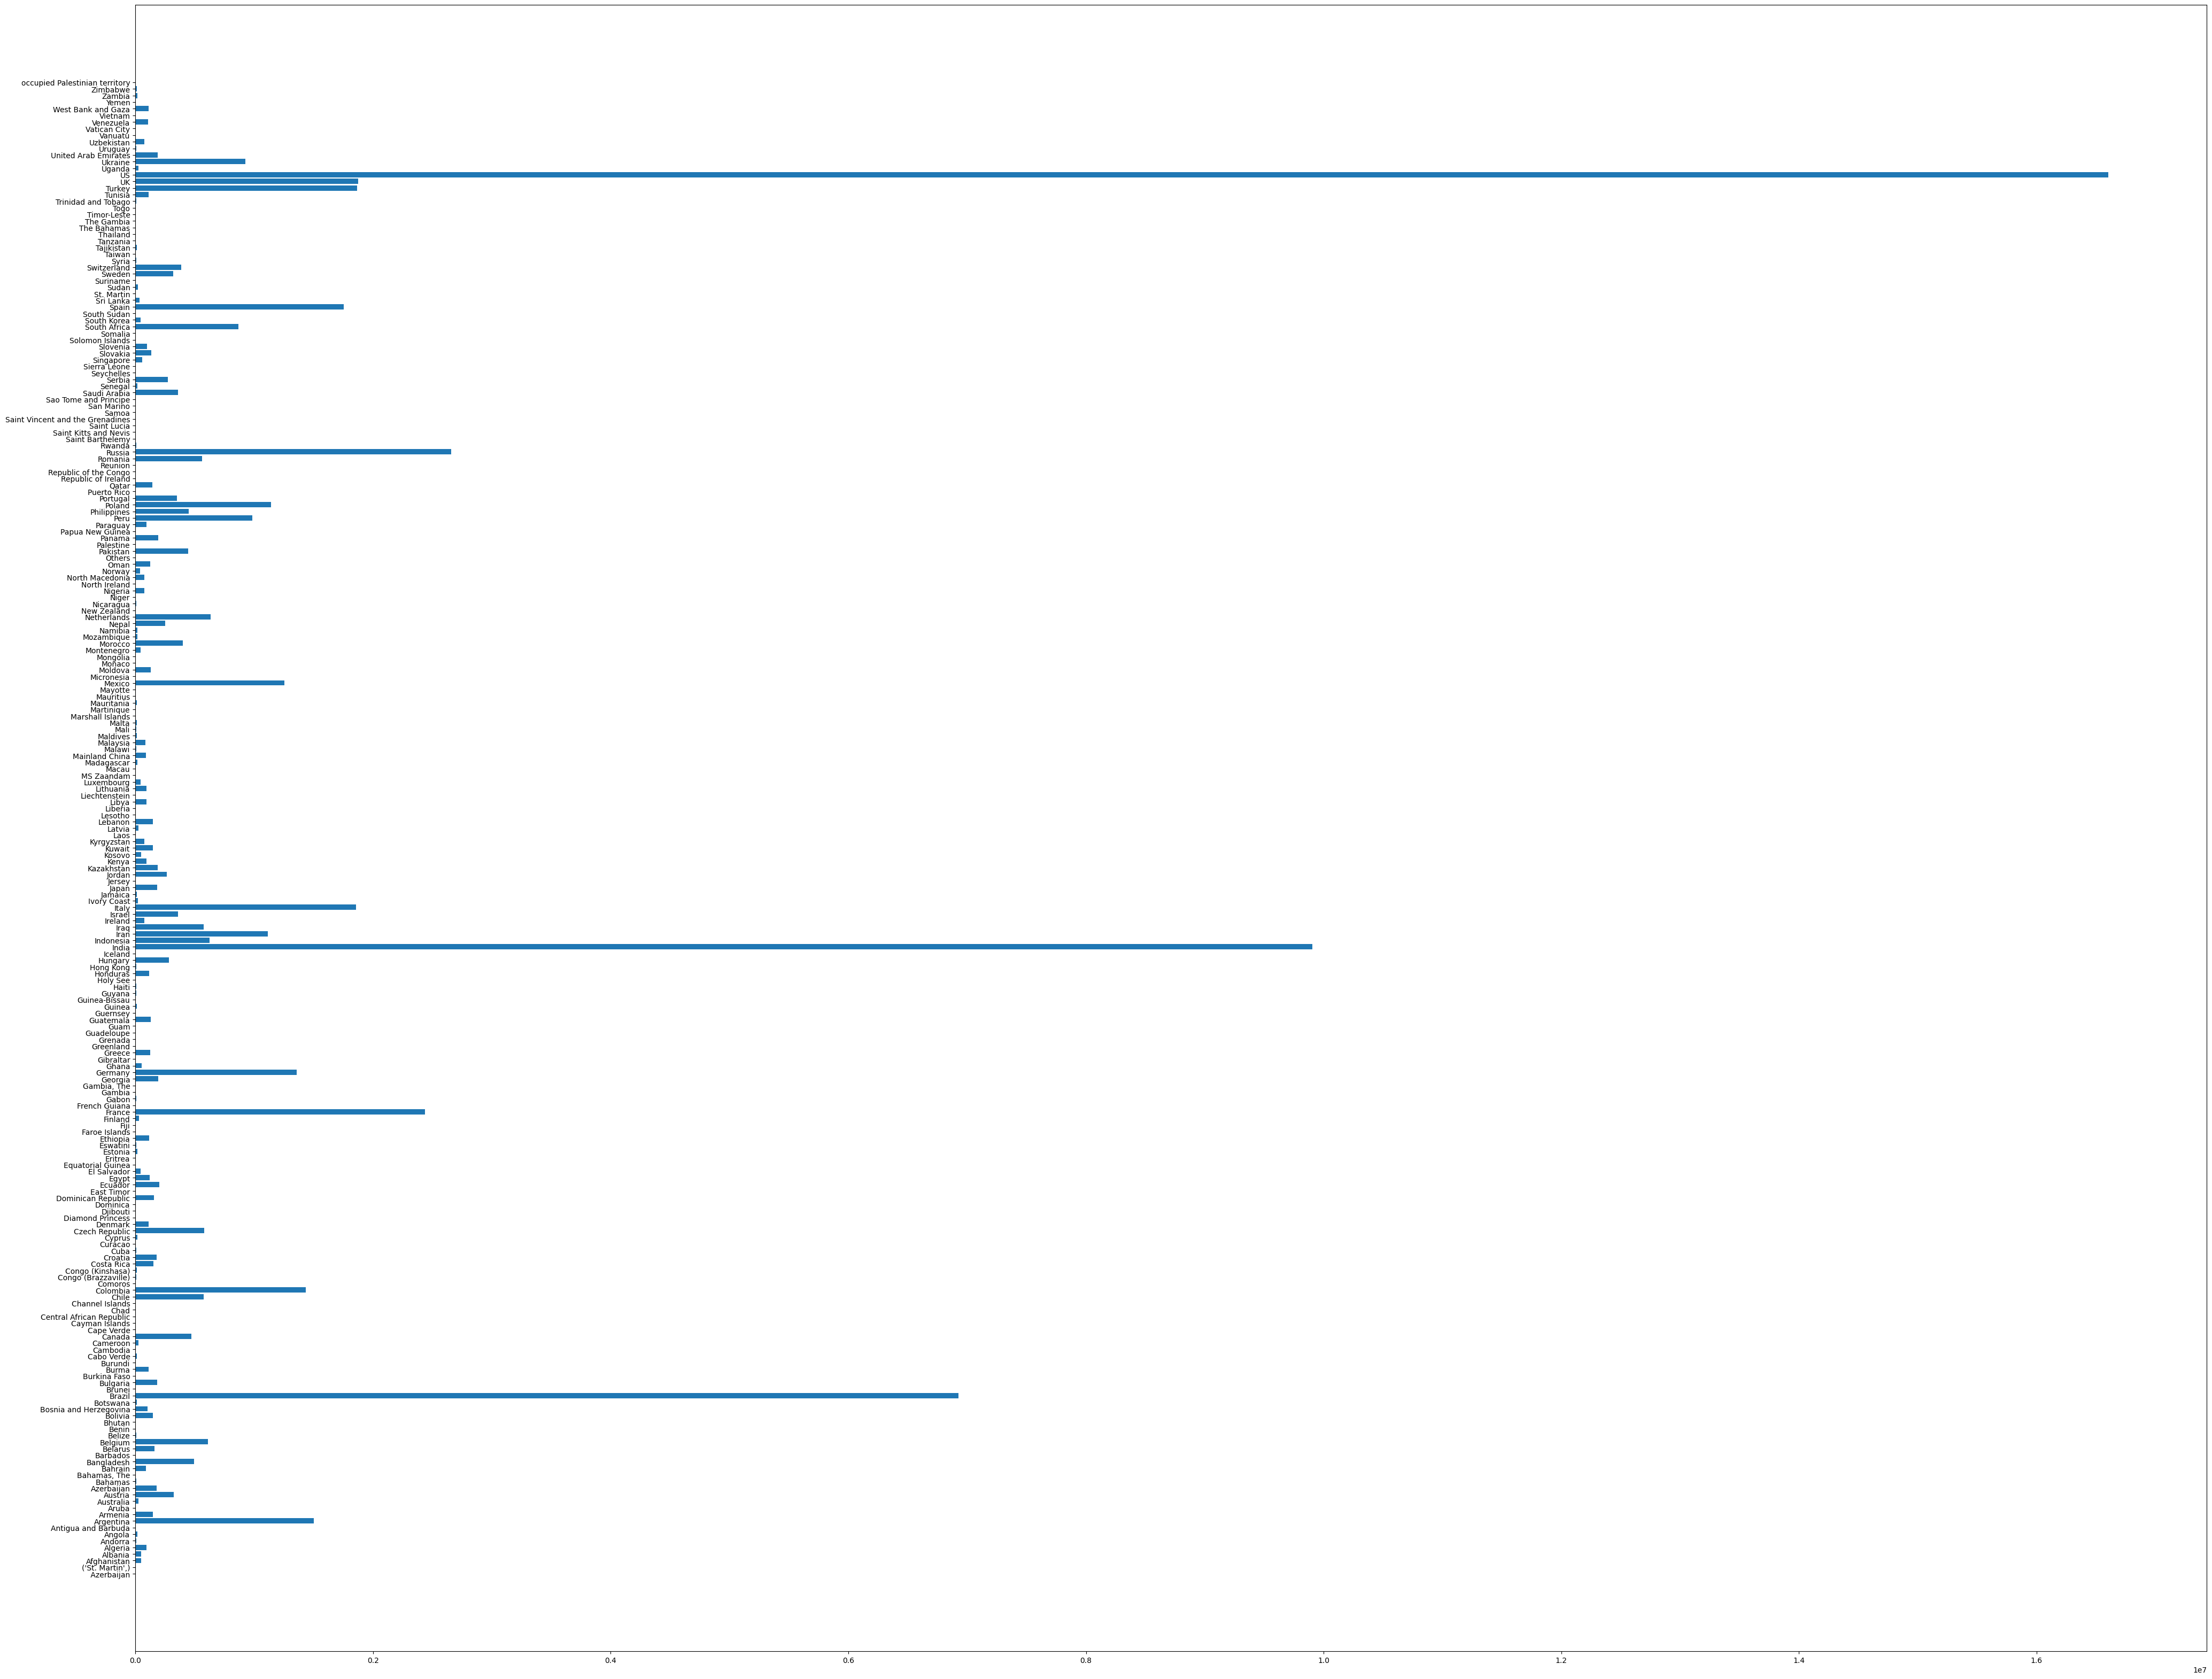

In [48]:
plt.figure(figsize = (50, 40))
plt.barh(unique_countries, confirmed_case_countries)
plt.show()

In [49]:
plt.figure(figsize = (100, 80))
plt.barh(unique_provinces, confirmed_case_provinces)
plt.show()

**Dalam bentuk Diagram**

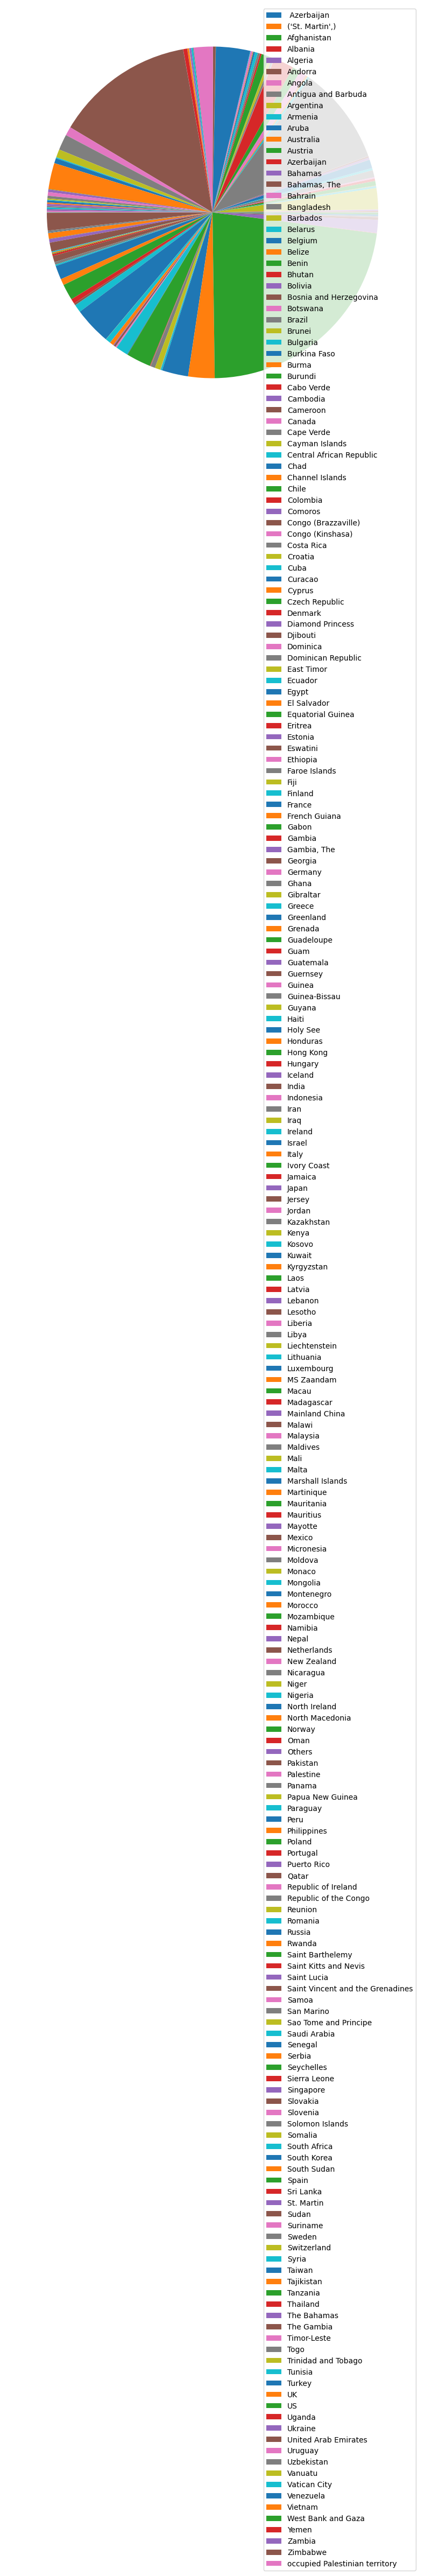

In [50]:
plt.figure(figsize = (10, 10))
plt.pie(confirmed_case_countries)
plt.legend(unique_countries, loc='best')
plt.show()

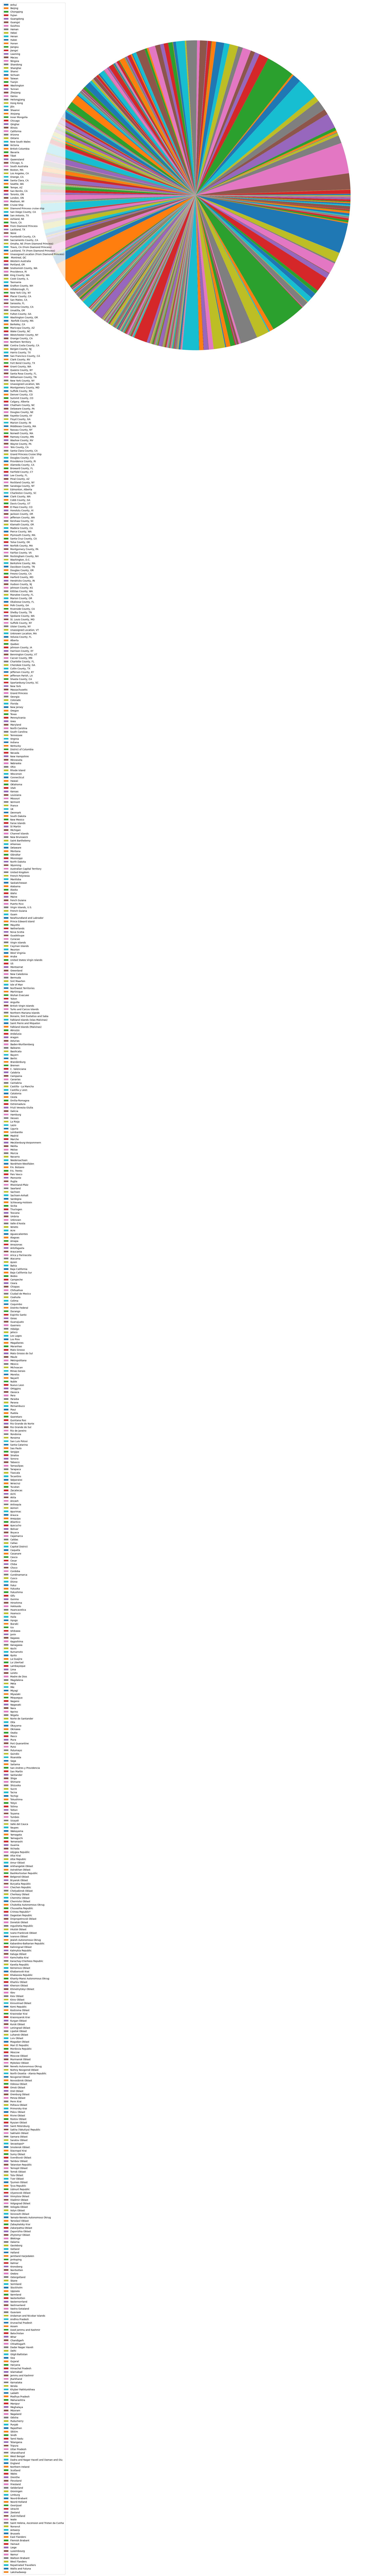

In [51]:
plt.figure(figsize = (30, 30))
plt.pie(confirmed_case_provinces)
plt.legend(unique_provinces, loc='best')
plt.show()